In [1]:
import vizdoom as vzd
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
possible_actions = np.zeros((6,4),dtype=int).tolist()
possible_actions[0] = [1,0,0,0]
possible_actions[1] = [0,1,0,0]
possible_actions[2] = [0,0,-45,0]
possible_actions[3] = [0,0,45,0]
possible_actions[4] = [0,0,0,10]
possible_actions[5] = [0,0,0,-10]

possible_actions

[[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, -45, 0],
 [0, 0, 45, 0],
 [0, 0, 0, 10],
 [0, 0, 0, -10]]

In [6]:
import numpy as np

def is_visible(raw_map, start_row, start_col, direction):
    """Проверяет видимость в заданном направлении."""
    row, col = start_row, start_col
    while 0 <= row < raw_map.shape[0] and 0 <= col < raw_map.shape[1]:
        if raw_map[row, col, 0] != 255:  # Если пиксель не белый
            return row, col  # Возвращаем координаты видимого пикселя
        row += direction[0]
        col += direction[1]
    return None  # Если ничего не найдено

def tracing(raw_map: np.array):
    # Заменяем значения больше 100 на белый цвет
    raw_map[raw_map[:, :, 0] > 100] = 255
    raw_map[raw_map[:, :, 1] > 100] = 255
    raw_map[raw_map[:, :, 2] > 100] = 255
    #raw_map[118:121, 158:161, :] = [255, 0, 0]

    # Создаем карту для отображения видимых стен
    map = np.ones_like(raw_map) * 255

    # Точка обзора
    view_point = (119, 158)

    # Определяем направления для "стрельбы" лучами (вверх, влево, вправо и диагонали)
    directions = [
        (-1, 0),   # вверх
        (0, -1),   # влево
        (0, 1),    # вправо
        (-1, -1),  # вверх-влево
        (-1, 1),   # вверх-вправо
        (-1, -2),  # вверх-влево-2
        (-1, 2),   # вверх-вправо-2
        (-1, -3),  # вверх-влево-3 
        (-1, 3),   # вверх-вправо-3
        (-1, -4),  # вверх-влево-4
        (-1, 4),   # вверх-вправо-4
    ]
    for j in range(0,160):
        directions1 = np.array([(-j,i) for i in range(0,120)])
        directions2 = np.array([(-j,-i) for i in range(0,120)])
        directions0 = np.concatenate(([(0,1),(0,-1)],directions1,directions2),axis=0)
        directions = np.concatenate((directions,directions0),axis=0)    
        # Проверяем видимость в каждом направлении
        for direction in directions:
            visible_pixel = is_visible(raw_map, view_point[0], view_point[1], direction)
            if visible_pixel is not None:
                map[visible_pixel[0], visible_pixel[1], :] = [0, 0, 0]  # Обозначаем как видимый

    return map

# Пример использования функции
# raw_map должен быть загружен заранее как NumPy массив.
# processed_map = divide_and_conquer(raw_map)


In [7]:
import numpy as np

def is_visible_segment(raw_map, start_row, end_row, col):
    """Проверяет видимость в сегменте по заданному столбцу."""
    for row in range(start_row, end_row + 1):
        if raw_map[row, col, 0] == 255:  # Если пиксель белый
            return False
    return True

def process_segment(raw_map, start_row, end_row, col_start, col_end, map):
    """Обрабатывает сегмент карты для определения видимости."""
    for col in range(col_end,col_start-1,-1):
        # Проверяем видимость сверху
        if is_visible_segment(raw_map, start_row, end_row, col):
            map[start_row, col, :] = [0, 0, 0]  # Обозначаем как видимый

def divide_and_conquer(raw_map: np.array):
    # Заменяем значения больше 100 на белый цвет
    raw_map[raw_map[:, :, 0] > 100] = 255
    raw_map[raw_map[:, :, 1] > 100] = 255
    raw_map[raw_map[:, :, 2] > 100] = 255
    raw_map[118:121, 158:161, :] = [255, 0, 0]

    map = np.ones_like(raw_map) * 255

    # Определяем границы для обработки
    height = raw_map.shape[0]
    width = raw_map.shape[1]

    # Разделяем и обрабатываем по строкам
    for row in range(120, -1, -1):
        left_col = -1
        right_col = -1
        
        # Ищем правую границу видимости
        for j in range(159, width):
            if raw_map[row, j, 0] != 255:
                right_col = j
                break
        
        # Ищем левую границу видимости
        for j in range(158, -1, -1):
            if raw_map[row, j, 0] != 255:
                left_col = j
                break
        
        if right_col != -1:
            map[row, right_col, :] = [0, 0, 0]
        if left_col != -1:
            map[row, left_col, :] = [0, 0, 0]

    # Обработка столбцов для видимости снизу
    for col in range(width):
        top_row = -1
        
        for i in range(118, -1, -1):
            if raw_map[i, col, 0] != 255:
                top_row = i
                break
        
        if top_row != -1:
            map[top_row, col, :] = [0, 0, 0]

    #map[118:121, 158:161,:] = [255,0,0]
    
    return map

# Пример использования функции
# raw_map должен быть загружен заранее как NumPy массив.
# processed_map = divide_and_conquer(raw_map)


In [8]:
def map_processing(raw_map: np.array):
    raw_map[raw_map[:,:,0] > 100] = 255  # Replace all values greater than 100 with 255
    raw_map[raw_map[:,:,1] > 100] = 255  # Replace all values greater than 100 with 255
    raw_map[raw_map[:,:,2] > 100] = 255  # Replace all values greater than 100 with 255
    raw_map[118:121,158:161,:] = [255,0,0]

    map = np.ones_like(raw_map)*255
    for i in range(120,-1,-1):
        j = 159
        while j!=320 and raw_map[i,j,0] == 255:
            j += 1
        if j!=320:
            map[i,j,:] = [0,0,0]
        j = 158
        while j!=0 and raw_map[i,j,0] == 255:
            j -= 1
        if j!=-1:
            map[i,j,:] = [0,0,0]
    for j in range(0,raw_map.shape[1]):
        i = 118
        while i!=0 and raw_map[i,j,0] == 255:
            i -= 1
        if i!=0:
            map[i,j,:] = [0,0,0]
    map[118:121,158:161,:] = [255,0,0]        
    return map
# duration 4 tics
def get_pictures(game: vzd.DoomGame):
    state = game.get_state()    
    st = state.screen_buffer.transpose(1,2,0)
    img = np.array([st])
    # turn left
    game.make_action(possible_actions[2])
    state = game.get_state()
    st = state.screen_buffer.transpose(1,2,0)
    img = np.append(img, [st], axis=0)
    dm = state.automap_buffer.transpose(1,2,0)
    debug_map = np.array([dm])
    # turn right
    game.make_action(possible_actions[3],2)
    state = game.get_state()
    st = state.screen_buffer.transpose(1,2,0)
    img = np.append(img, [st], axis=0)
    dm = state.automap_buffer.transpose(1,2,0)
    debug_map = np.append(debug_map, [dm], axis=0)
    # return to center
    game.make_action(possible_actions[2])
    state = game.get_state()
    dm = state.automap_buffer.transpose(1,2,0)
    debug_map = np.append(debug_map, [dm], axis=0)
    auto_map = state.automap_buffer.transpose(1,2,0)
    #processed_map = map_processing(auto_map)
    processed_map = divide_and_conquer(auto_map)
    #processed_map = tracing(auto_map)
    return img, auto_map, processed_map,debug_map


In [182]:
game = vzd.DoomGame()
game.load_config('resources/temp_maps/datagen.cfg')
game.init()
game.set_seed(23)
game.new_episode()
#game.set_automap_mode(vzd.AutomapMode.WHOLE)
state = game.get_state()
st = state.screen_buffer.transpose(1,2,0)
img = np.array([st])  # Initialize as numpy array with first frame
am = state.automap_buffer.transpose(1,2,0)
#auto_map = np.array([am])
depth = np.array([state.depth_buffer])
game.set_automap_mode(vzd.AutomapMode.NORMAL)
img, auto_map, processed_map, debug_map = get_pictures(game)
game.close()


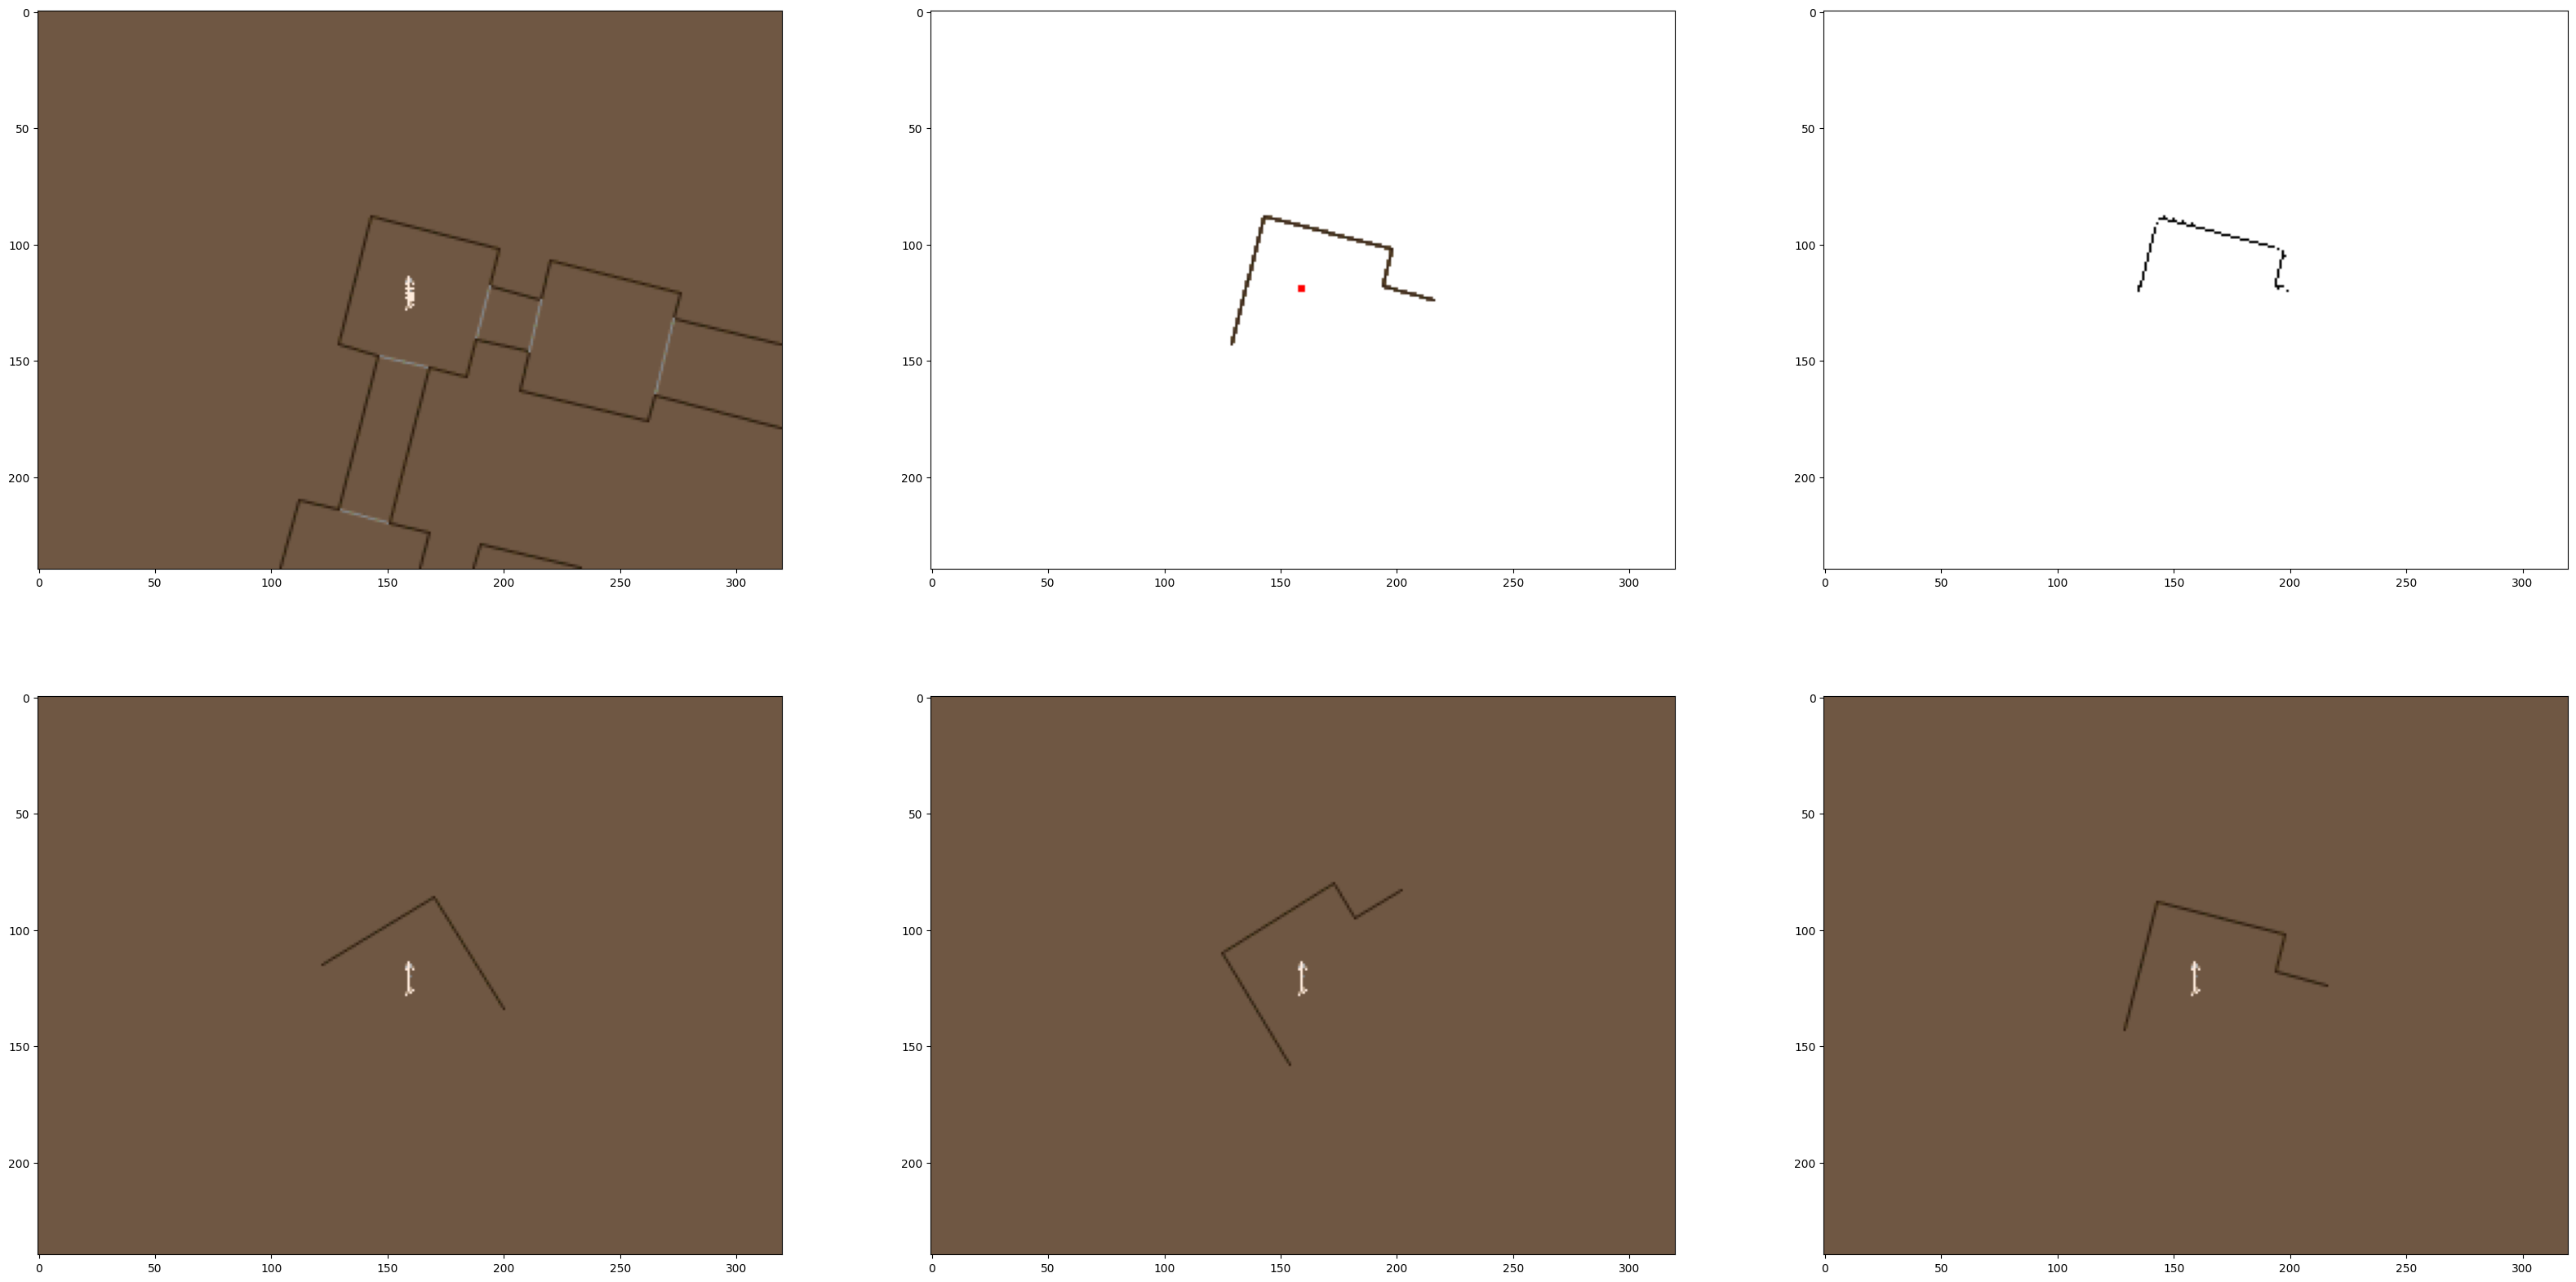

In [183]:
fig, ax = plt.subplots(2,3,figsize=(40,20))
ax[0,0].imshow(am)
ax[0,1].imshow(auto_map)
ax[0,2].imshow(processed_map)
ax[1,0].imshow(debug_map[0])
ax[1,1].imshow(debug_map[1])
ax[1,2].imshow(debug_map[2])



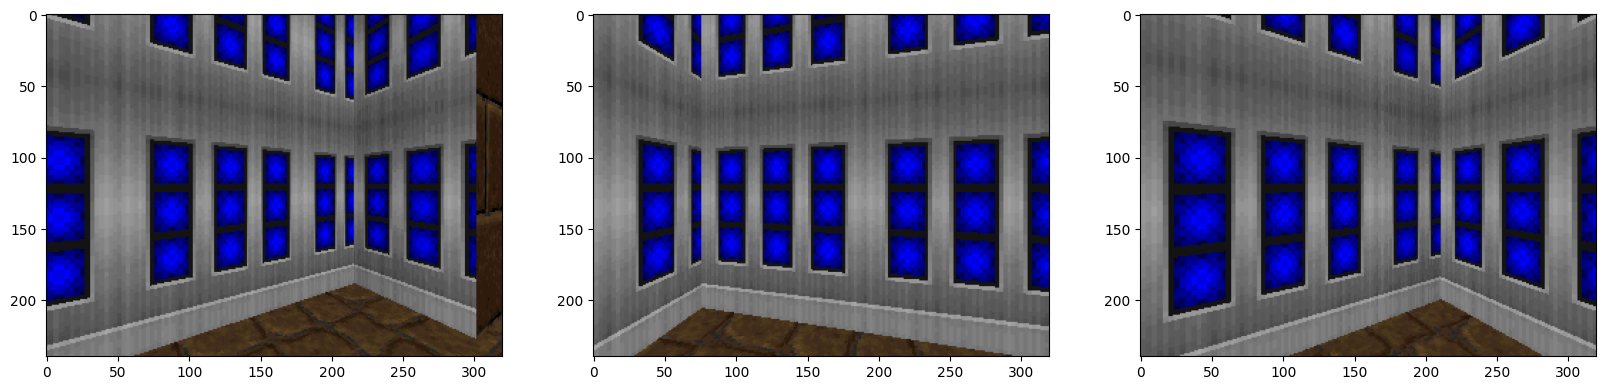

In [113]:
fix, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(img[2])
ax[1].imshow(img[0])
ax[2].imshow(img[1])

In [9]:
# Инициализация Q-таблицы
q_table = np.zeros((10000, len(possible_actions)))  # Пример размера состояния
learning_rate = 0.1
discount_factor = 0.95
exploration_rate = 1.0
exploration_decay = 0.995
min_exploration_rate = 0.01

In [30]:
# Initialize game
import cv2
possible_actions = np.zeros((8,5),dtype=int).tolist()
possible_actions[0] = [1,0,0,0,0]    # Move forward
possible_actions[1] = [0,1,0,0,0]    # Move backward 
possible_actions[2] = [5,0,-45,0,0]  # Turn left
possible_actions[3] = [5,0,45,0,0]   # Turn right
possible_actions[4] = [0,0,0,10,0]   # Move right
possible_actions[5] = [0,0,0,-10,0]  # Move left
possible_actions[6] = [0,0,0,0,5]    # Move right (delta)
possible_actions[7] = [0,0,0,0,-5]   # Move left (delta)

game = vzd.DoomGame()
game.load_config('resources/temp_maps/datagen.cfg')
game.set_doom_scenario_path('data/mazemaker_maps/15x15.wad')
game.init()
game.new_episode()
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
video = cv2.VideoWriter('debug0.avi',fourcc,10,(320,240))

def get_state_features(state):
    """Extract relevant features from the state"""
    # Get position and angle
    game_vars = state.game_variables
    pos_x, pos_y, pos_z, angle = game_vars
    
    # Get depth information from center of view
    depth_buffer = state.depth_buffer
    center_depth = depth_buffer[119:121, 159:161].mean()
    
    # Combine features
    return (pos_x, pos_y, angle, center_depth)

def get_state_index(features):
    """Convert continuous state features to discrete index"""
    # Discretize each feature
    x_bin = int(features[0] / 50)  # Position binning
    y_bin = int(features[1] / 50)
    angle_bin = int((features[2] + 180) / 45)  # Angle binning into 8 directions
    depth_bin = int(features[3] / 20)  # Depth binning
    
    # Combine discretized features into single index
    return (x_bin * 1000 + y_bin * 100 + angle_bin * 10 + depth_bin) % 10000

images,_,maps,_ = get_pictures(game)

# Initialize parameters
learning_rate = 0.1
discount_factor = 0.99
exploration_rate = 1.0
exploration_decay = 0.997
min_exploration_rate = 0.05

# Add curiosity-driven exploration
curiosity_bonus = np.zeros((10000,))  # Track state visits
curiosity_weight = 0.1

s = 0
episode_reward = 0
while not game.is_episode_finished():
    state = game.get_state()
    st = state.screen_buffer.transpose(1,2,0)
    
    # Get state features and index
    state_features = get_state_features(state)
    current_state_index = get_state_index(state_features)
    
    # Add curiosity bonus to exploration
    exploration_bonus = curiosity_weight / (curiosity_bonus[current_state_index] + 1)
    
    # Action selection with curiosity-driven exploration
    if random.uniform(0, 1) < exploration_rate + exploration_bonus:
        # Smarter random action selection based on depth
        if state_features[3] > 30:  # If far from walls
            action_index = random.choice([0, 4, 5]) # Forward and lateral movement
        else:
            action_index = random.choice([1, 2, 3]) # Backward and turning
    else:
        action_index = np.argmax(q_table[current_state_index])

    # Execute action
    reward = game.make_action(possible_actions[action_index])
    episode_reward += reward
    
    # Update curiosity tracking
    curiosity_bonus[current_state_index] += 1
    
    if s%25==0:
        temp_images,_,temp_map,_ = get_pictures(game)
        images = np.append(images,temp_images,axis=0)
        maps = np.append(maps,temp_map,axis=0)
        
    # Get next state and update Q-table
    next_state = game.get_state()
    if next_state is not None:
        next_features = get_state_features(next_state)
        next_state_index = get_state_index(next_features)
        
        # Q-learning update with curiosity bonus
        best_next_action_value = np.max(q_table[next_state_index])
        current_q = q_table[current_state_index][action_index]
        q_table[current_state_index][action_index] = current_q + learning_rate * (
            reward + exploration_bonus + discount_factor * best_next_action_value - current_q
        )
    
    video.write(st)
    
    # Decay exploration rate
    exploration_rate *= exploration_decay
    exploration_rate = max(min_exploration_rate, exploration_rate)
    s += 1

print(f"Episode finished with total reward: {episode_reward}")
game.close()
video.release()

Episode finished with total reward: 0.0


In [184]:
# Инициализация игры
game = vzd.DoomGame()
game.load_config('resources/temp_maps/datagen.cfg')
game.init()
game.set_seed(1)
game.new_episode()
temp_images,_,temp_map,_ = get_pictures(game)
images = np.array([temp_images])
maps = np.array([temp_map])
s=0
# Основной цикл игры
while not game.is_episode_finished():
    state = game.get_state()
    st = state.screen_buffer.transpose(1,2,0)
    depth = np.array([state.depth_buffer])
    # action
    action_index = np.random.choice([4]) if depth[0,119,159] > 10 else np.random.choice([2,3,5])
    # Выполнение действия и получение награды
    reward = game.make_action(possible_actions[action_index])
    if s%25==0:
        temp_images,_,temp_map,_ = get_pictures(game)
        images = np.append(images,[temp_images],axis=0)
        maps = np.append(maps,[temp_map],axis=0)
    s += 1

# Завершение игры
game.close()

In [185]:
images.shape,maps.shape


((36, 3, 240, 320, 3), (36, 240, 320, 3))

C:\Users\Max\AppData\Local\Temp\ipykernel_7772\3788626425.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fix,ax = plt.subplots(1,3,figsize=(20,10))


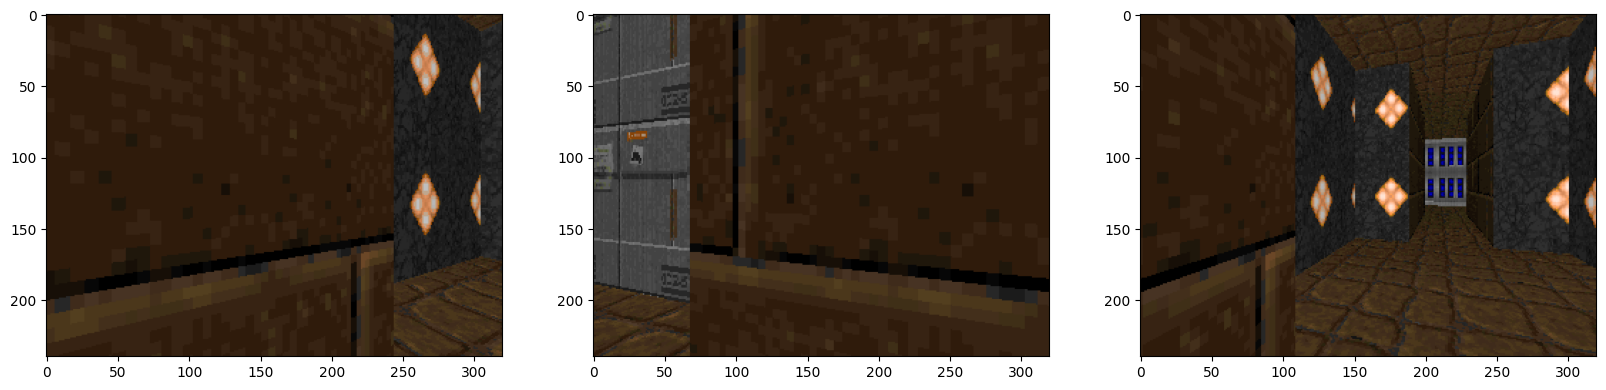

Error in callback <function flush_figures at 0x0000025552483740> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [186]:
for i in range(len(images)):
    fix,ax = plt.subplots(1,3,figsize=(20,10))
    ax[0].imshow(images[i,0])
    ax[1].imshow(images[i,1])
    ax[2].imshow(images[i,2])



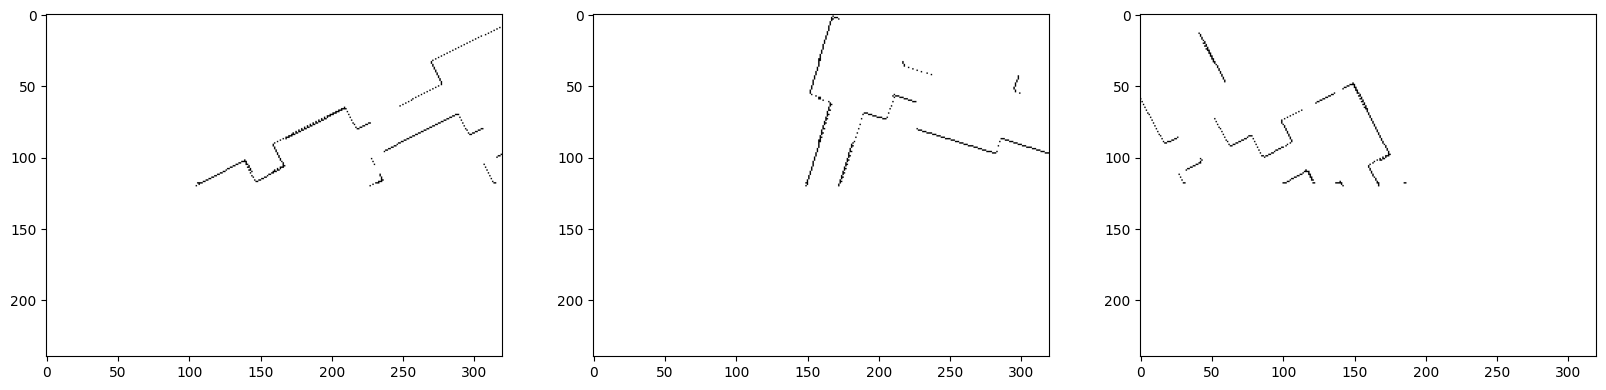

In [187]:
fig,ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(maps[0])
ax[1].imshow(maps[5])
ax[2].imshow(maps[10])


In [188]:
# Save the image and map data to separate .npy files
np.save('debug_images0.npy', images)
np.save('debug_maps0.npy', maps)

# Alternatively, save both arrays in a single .npz file
# np.savez('doom_data.npz', images=images, maps=maps)


In [ ]:
data = np.load('')